In [2]:
import string
import re
import nltk
from nltk.corpus import stopwords
import networkx as nx
import matplotlib.pyplot as plt
import operator
import pandas as pd
import numpy as np
from numpy import linalg as LA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/javier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
!pip install -U spacy
!pip install -U spacy-lookups-data
!python -m spacy download es_core_news_sm

Requirement already up-to-date: spacy in /home/javier/anaconda3/lib/python3.6/site-packages (2.2.3)
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Requirement already up-to-date: spacy-lookups-data in /home/javier/anaconda3/lib/python3.6/site-packages (0.2.0)
You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [5]:
# https://github.com/pablodms/spacy-spanish-lemmatizer
!pip install es-lemmatizer

You are using pip version 19.0.3, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [6]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [7]:
# rule-based lemmatization
from es_lemmatizer import lemmatize
nlp.add_pipe(lemmatize, after='tagger')

## read data
### chile+bolivia+ecuador+uruguay+costa rica+peru+argentina+colombia+paraguay+venezuela

In [11]:
f = open("constituciones/chile.txt", "r") 
chile=f.read()

In [12]:
g = open("constituciones/bolivia.txt", "r") 
bolivia=g.read()

In [13]:
h = open("constituciones/ecuador.txt", "r") 
ecuador=h.read()

In [14]:
i = open("constituciones/uruguay.txt", "r") 
uruguay=i.read()

In [15]:
j = open("constituciones/costarica.txt", "r") 
costarica=j.read()

In [16]:
k = open("constituciones/peru.txt", "r") 
peru=k.read()

In [17]:
l = open("constituciones/argentina.txt", "r") 
argentina=l.read()

In [18]:
m = open("constituciones/colombia.txt", "r") 
colombia=m.read()

In [19]:
n = open("constituciones/paraguay.txt", "r") 
paraguay=n.read()

In [20]:
o = open("constituciones/venezuela.txt", "r") 
venezuela=o.read()

In [21]:
p = open("constituciones/cuba.txt", "r") 
cuba=p.read()

In [22]:
q = open("constituciones/elsalvador.txt", "r") 
elsalvador=q.read()

In [23]:
r = open("constituciones/guatemala.txt", "r") 
guatemala=r.read()

In [24]:
s = open("constituciones/honduras.txt", "r") 
honduras=s.read()

In [25]:
t = open("constituciones/mexico.txt", "r") 
mexico=t.read()

In [26]:
u = open("constituciones/nicaragua.txt", "r") 
nicaragua=u.read()

In [27]:
v = open("constituciones/panama.txt", "r") 
panama=v.read()

In [28]:
w = open("constituciones/republicadominicana.txt", "r") 
republicadominicana=w.read()

In [29]:
chile[:1000]

'Capítulo I\n\n     BASES DE LA INSTITUCIONALIDAD\n\n\n\n\n     Artículo 1°.- Las personas nacen libres e iguales en dignidad y derechos.\n     La familia es el núcleo fundamental de la sociedad.\n     El Estado reconoce y ampara a los grupos intermedios a través de los cuales se organiza y estructura la sociedad y les garantiza la adecuada autonomía para cumplir sus propios fines específicos.\n     El Estado está al servicio de la persona humana y su finalidad es promover el bien común, para lo cual debe contribuir a crear las condiciones sociales que permitan a todos y a cada uno de los integrantes de la comunidad nacional su mayor realización espiritual y material posible, con pleno respeto a los derechos y garantías que esta Constitución establece.\n     Es deber del Estado resguardar la seguridad nacional, dar protección a la población y a la familia, propender al fortalecimiento de ésta, promover la integración armónica de todos los sectores de la Nación y asegurar el derecho de 

In [30]:
bolivia[:1000]

'PREÁMBULO\n\nEn tiempos inmemoriales se erigieron montañas, se desplazaron ríos, se formaron lagos. Nuestra amazonia, nuestro chaco, nuestro altiplano y nuestros llanos y valles se cubrieron de verdores y flores. Poblamos esta sagrada Madre Tierra con rostros diferentes, y comprendimos desde entonces la pluralidad vigente de todas las cosas y nuestra diversidad como seres y culturas. Así conformamos nuestros pueblos, y jamás comprendimos el racismo hasta que lo sufrimos desde los funestos tiempos de la colonia.\n\nEl pueblo boliviano, de composición plural, desde la profundidad de la historia, inspirado en las luchas del pasado, en la sublevación indígena anticolonial, en la independencia, en las luchas populares de liberación, en las marchas indígenas, sociales y sindicales, en las guerras del agua y de octubre, en las luchas por la tierra y territorio, y con la memoria de nuestros mártires, construimos un nuevo Estado.\n\nUn Estado basado en el respeto e igualdad entre todos, con pr

In [31]:
ecuador[:1000]

'Preámbulo\n\nNosotras y nosotros, el pueblo soberano del Ecuador\n\nRECONOCIENDO nuestras raíces milenarias, forjadas por mujeres y hombres de distintos pueblos,\n\nCELEBRANDO a la naturaleza, la Pacha Mama, de la que somos parte y que es vital para nuestra existencia,\n\nINVOCANDO el nombre de Dios y reconociendo nuestras diversas formas de religiosidad y espiritualidad,\n\nAPELANDO a la sabiduría de todas las culturas que nos enriquecen como sociedad,\n\nCOMO HEREDEROS de las luchas sociales de liberación frente a todas las formas de dominación y colonialismo,\n\nY con un profundo compromiso con el presente y el futuro,\n\nDecidimos construir\n\nUna nueva forma de convivencia ciudadana, en diversidad y armonía con la naturaleza, para alcanzar el buen vivir, el sumak kawsay;\n\nUna sociedad que respeta, en todas sus dimensiones, la dignidad de las personas y las colectividades;\n\nUn país democrático, comprometido con la integración latinoamericana —sueño de Bolívar y Alfaro-, la paz

In [32]:
uruguay[:1000]

'SECCIÓN I. DE LA NACIÓN Y SU SOBERANIA\nCAPÍTULO I\nArtículo 1º\n\nLa República Oriental del Uruguay es la asociación política de todos los habitantes comprendidos dentro de su territorio.\nArtículo 2º\n\nElla es y será para siempre libre e independiente de todo poder extranjero.\nArtículo 3º\n\nJamás será el patrimonio de personas ni de familia alguna.\nCAPÍTULO II\nArtículo 4º\n\nLa soberanía en toda su plenitud existe radicalmente en la Nación, a la que compete el derecho exclusivo de establecer sus leyes, del modo que más adelante se expresará.\nCAPÍTULO III\nArtículo 5º\n\nTodos los cultos religiosos son libres en el Uruguay. El Estado no sostiene religión alguna. Reconoce a la Iglesia Católica el dominio de todos los templos que hayan sido total o parcialmente construidos con fondos del Erario Nacional, exceptuándose sólo las capillas destinadas al servicio de asilos, hospitales, cárceles u otros establecimientos públicos. Declara, asimismo, exentos de toda clase de impuestos a 

In [33]:
costarica[:1000]

'PREÁMBULO\n\nNosotros, los Representantes del pueblo de Costa Rica, libremente elegidos Diputados a la Asamblea Nacional Constituyente, invocando el nombre de Dios y reiterando nuestra fe en la Democracia, decretamos y sancionamos la siguiente:\nTÍTULO I. LA REPÚBLICA\nCapítulo Único\nARTÍCULO 1\n\nCosta Rica es una República democrática, libre, independiente, multiétnica y pluricultural.\nARTÍCULO 2\n\nLa Soberanía reside exclusivamente en la Nación.\nARTÍCULO 3\n\nNadie puede arrogarse la soberanía; el que lo hiciere cometerá el delito de traición a la Patria.\nARTÍCULO 4\n\nNinguna persona o reunión de personas puede asumir la representación del pueblo, arrogarse sus derechos, o hacer peticiones a su nombre. La infracción a este artículo será sedición.\nARTÍCULO 5\n\nEl territorio nacional está comprendido entre el Mar Caribe, el Océano Pacífico y las Repúblicas de Nicaragua y Panamá. Los límites de la República son los que determina el Tratado Cañas - Jerez de 15 de abril de 1858 

In [34]:
peru[:1000]

'\nPREÁMBULO\n\nEL CONGRESO CONSTITUYENTE DEMOCRÁTICO, INVOCANDO A DIOS TODOPODEROSO, OBEDECIENDO EL MANDATO DEL PUEBLO PERUANO Y RECORDANDO EL SACRIFICIO DE TODAS LAS GENERACIONES QUE NOS HAN PRECEDIDO EN NUESTRA PATRIA, HA RESUELTO DAR LA SIGUIENTE CONSTITUCION:\nTÍTULO I. DE LA PERSONA Y DE LA SOCIEDAD\nCAPÍTULO I. DERECHOS FUNDAMENTALES DE LA PERSONA\nArtículo 1°\n\nLa defensa de la persona humana y el respeto de su dignidad son el fin supremo de la sociedad y del Estado.\nArtículo 2°\n\nToda persona tiene derecho:\n\n    1. A la vida, a su identidad, a su integridad moral, psíquica y física y a su libre desarrollo y bienestar. El concebido es sujeto de derecho en todo cuanto le favorece.\n    2. A la igualdad ante la ley. Nadie debe ser discriminado por motivo de origen, raza, sexo, idioma, religión, opinión, condición económica o de cualquiera otra índole.\n    3. A la libertad de conciencia y de religión, en forma individual o asociada. No hay persecución por razón de ideas o cr

In [35]:
argentina[:1000]

'PREÁMBULO\n\nNos los representantes del pueblo de la Nación Argentina, reunidos en Congreso General Constituyente por voluntad y elección de las provincias que la componen, en cumplimiento de pactos preexistentes, con el objeto de constituir la unión nacional, afianzar la justicia, consolidar la paz interior, proveer a la defensa común, promover el bienestar general, y asegurar los beneficios de la libertad, para nosotros, para nuestra posteridad, y para todos los hombres del mundo que quieran habitar en el suelo argentino: invocando la protección de Dios, fuente de toda razón y justicia: ordenamos, decretamos y establecemos esta Constitución, para la Nación Argentina.\nPRIMERA PARTE\nCAPÍTULO PRIMERO. DECLARACIONES, DERECHOS Y GARANTÍAS\nArtículo 1\n\nLa Nación Argentina adopta para su gobierno la forma representativa republicana federal, según la establece la presente Constitución.\nArtículo 2\n\nEl Gobierno federal sostiene el culto católico apostólico romano.\nArtículo 3\n\nLas au

In [36]:
colombia[:1000]

'\n\nPreámbulo\nEL PUEBLO DE COLOMBIA,\n\nen ejercicio de su poder soberano, representado por sus delegatarios a la Asamblea Nacional Constituyente, invocando la protección de Dios, y con el fin de fortalecer la unidad de la Nación y asegurar a sus integrantes la vida, la convivencia, el trabajo, la justicia, la igualdad, el conocimiento, la libertad y la paz, dentro de un marco jurídico, democrático y participativo que garantice un orden político, económico y social justo, y comprometido a impulsar la integración de la comunidad latinoamericana, decreta, sanciona y promulga la siguiente\nTITULO I. DE LOS PRINCIPIOS FUNDAMENTALES\nArtículo 1\n\nColombia es un Estado social de derecho, organizado en forma de República unitaria, descentralizada, con autonomía de sus entidades territoriales, democrática, participativa y pluralista, fundada en el respeto de la dignidad humana, en el trabajo y la solidaridad de las personas que la integran y en la prevalencia del interés general.\nArtículo 

In [37]:
paraguay[:1000]

'\nPREÁMBULO\n\nEl pueblo paraguayo, por medio de sus legítimos representantes reunidos en Convención Nacional Constituyente, invocando a Dios, reconociendo la dignidad humana con el fin de asegurar la libertad, la igualdad y la justicia, reafirmando los principios de la democracia republicana, representativa, participativa y pluralista, ratificando la soberanía e independencia nacionales, e integrado a la comunidad internacional, sanciona y promulga esta Constitución.\n\nAsunción, 20 de junio de 1992\nParte I. De las declaraciones fundamentales, de los derechos, de los deberes y de las garantías\nTítulo I. De las declaraciones fundamentales\nArtículo 1. De la forma del estado y de gobierno\n\nLa República del Paraguay es para siempre libre e independiente. Se constituye en Estado social de derecho, unitario, indivisible, y descentralizado en la forma que se establecen esta Constitución y las leyes.\n\nLa República del Paraguay adopta para su gobierno la democracia representativa, part

In [38]:
venezuela[:1000]

'PREÁMBULO\n\nEl pueblo de Venezuela, en ejercicio de sus poderes creadores e invocando la protección de Dios, el ejemplo histórico de nuestro Libertador Simón Bolívar y el heroísmo y sacrificio de nuestros antepasados aborígenes y de los precursores y forjadores de una patria libre y soberana; Con el fin supremo de refundar la República para establecer una sociedad democrática, participativa y protagónica, multiétnica y pluricultural en un Estado de justicia, federal y descentralizado, que consolide los valores de la libertad, la independencia, la paz, la solidaridad, el bien común, la integridad territorial, la convivencia y el imperio de la ley para esta y las futuras generaciones; asegure el derecho a la vida, al trabajo, a la cultura, a la educación, a la justicia social y a la igualdad sin discriminación ni subordinación alguna; promueva la cooperación pacífica entre las naciones e impulse y consolide la integración latinoamericana de acuerdo con el principio de no intervención y

In [39]:
cuba[:1000]

'Preámbulo\n\nNOSOTROS, EL PUEBLO DE CUBA,\n\ninspirados en el heroísmo y patriotismo de los que lucharon por una Patria libre, independiente, soberana, democrática, de justicia social y solidaridad humana, forjada en el sacrificio de nuestros antecesores;\n\npor los aborígenes que se resistieron a la sumisión;\n\npor los esclavos que se rebelaron contra sus amos;\n\npor los que despertaron la conciencia nacional y el ansia cubana de patria y libertad;\n\npor los patriotas que a partir de 1868 iniciaron y participaron en nuestras luchas independentistas contra el colonialismo español, y a los que en el último impulso de 1895 les fuera frustrada la victoria al producirse la intervención y ocupación militar del imperialismo yanqui en 1898;\n\npor los que lucharon durante más de cincuenta años contra el dominio imperialista, la corrupción política, la falta de derechos y libertades populares, el desempleo, la explotación impuesta por capitalistas, terratenientes y otros males sociales;\n\

In [40]:
elsalvador[:1000]

'PREÁMBULO\n\nNosotros, representantes del pueblo salvadoreño reunidos en Asamblea Constituyente, puesta nuestra confianza en Dios, nuestra voluntad en los altos destinos de la patria y en ejercicio de la potestad soberana que el pueblo de El Salvador nos ha conferido, animados del ferviente deseo de establecer los fundamentos de la convivencia nacional, con base en el respeto de la dignidad de la persona humana, en la construcción de una sociedad más justa, esencia de la democracia y el espíritu de libertad y justicia, valores de nuestra herencia humanista, decretamos, sancionamos y proclamamos la siguiente constitución.\nTÍTULO I\nCAPÍTULO ÚNICO. LA PERSONA HUMANA Y LOS FINES DEL ESTADO\nArtículo 1\n\nEl Salvador reconoce a la persona humana como el origen y el fin de la actividad del Estado, que está organizado para la consecución de la justicia, de la seguridad jurídica y del bien común.\n\nAsimismo reconoce como persona humana a todo ser humano desde el instante de la concepción.\

In [41]:
guatemala[:1000]

'PREÁMBULO\n\nINVOCANDO EL NOMBRE DE DIOS\n\nNosotros, los representantes del pueblo de Guatemala, electos libre y democráticamente, reunidos en Asamblea Nacional Constituyente, con el fin de organizar jurídica y políticamente el Estado; afirmando la primacía de la persona humana como sujeto y fin del orden social; reconociendo a la familia como génesis primario y fundamental de los valores espirituales y morales de la sociedad y, al Estado, como responsable de la promoción del bien común, de la consolidación del régimen de legalidad, seguridad, justicia, igualdad, libertad y paz; inspirados en los ideales de nuestros antepasados y recogiendo nuestras tradiciones y herencia cultural; decididos a impulsar la plena vigencia de los Derechos Humanos dentro de un orden institucional estable, permanente y popular, donde gobernados y gobernantes procedan con absoluto apego al derecho.\n\nSOLEMNEMENTE DECRETAMOS, SANCIONAMOS Y PROMULGAMOS LA SIGUIENTE: CONSTITUCION POLITICA DE LA REPUBLICA DE 

In [42]:
honduras[:1000]

'PREÁMBULO\n\nNosotros, Diputados electos por la voluntad soberana del pueblo hondureño, reunidos en Asamblea Nacional Constituyente, invocando la protección de Dios y el ejemplo de nuestros próceres, con nuestra fe puesta en la restauración de la unión centroamericana e interpretando fielmente las aspiraciones del pueblo que nos confirió su mandato, decretamos y sancionamos la presente Constitución para que fortalezca y perpetúe un Estado de derecho que asegure una sociedad política, económica y socialmente justa que afirme la nacionalidad y propicie las condiciones para la plena realización del hombre, como persona humana, dentro de la justicia, la libertad, la seguridad, la estabilidad, el pluralismo, la paz, la democracia representativa y el bien común.\nTÍTULO I. DEL ESTADO\nCAPÍTULO I. DE LA ORGANIZACIÓN DEL ESTADO\nArtículo 1\n\nHonduras es un Estado de Derecho, soberano, constituido como República libre, democrática e independiente para asegurar a sus habitantes el goce de la j

In [43]:
mexico[:1000]

'Título Primero\nCapítulo I. De los Derechos Humanos y sus Garantías\nArtículo 1°\n\nEn los Estados Unidos Mexicanos todas las personas gozarán de los derechos humanos reconocidos en esta Constitución y en los tratados internacionales de los que el Estado Mexicano sea parte, así como de las garantías para su protección, cuyo ejercicio no podrá restringirse ni suspenderse, salvo en los casos y bajo las condiciones que esta Constitución establece.\n\nLas normas relativas a los derechos humanos se interpretarán de conformidad con esta Constitución y con los tratados internacionales de la materia favoreciendo en todo tiempo a las personas la protección más amplia.\n\nTodas las autoridades, en el ámbito de sus competencias, tienen la obligación de promover, respetar, proteger y garantizar los derechos humanos de conformidad con los principios de universalidad, interdependencia, indivisibilidad y progresividad. En consecuencia, el Estado deberá prevenir, investigar, sancionar y reparar las v

In [44]:
nicaragua[:1000]

'PREÁMBULO\n\nNOSOTROS,\n\nRepresentantes del Pueblo de Nicaragua, reunidos en Asamblea Nacional Constituyente.\n\nEvocando\n\nLa lucha de nuestros antepasados indigenas.\n\nEl espíritu de unidad centroamericana y la tradición combativa de nuestro Pueblo que, inspirado en el ejemplo del General JOSE DOLORES ESTRADA, ANDRES CASTRO Y ENMANUEL MONGALO, derrotó al dominio filibustero y la intervención norteamericana en la Guerra Nacional.\n\nAl Prócer de la Independencia Cultural de la Nación, Poeta Universal RUBÉN DARÍO.\n\nLa gesta antintervencionista de BENJAMIN ZELEDON.\n\nAl General de Hombres Libres, AUGUSTO C. SANDINO, Padre de la Revolución Popular y Antimperialista.\n\nLa acción heroica de RIGOBERTO LOPEZ PEREZ, iniciador del principio del fin de la dictadura.\n\nEl ejemplo de CARLOS FONSECA, el más alto continuador de la herencia de Sandino, fundador del Frente Sandinista de Liberación Nacional y Jefe de la Revolución.\n\nAl Mártir de la Libertades Públicas, Doctor PEDRO JOAQUÍN 

In [45]:
panama[:1000]

'PREÁMBULO\n\nCon el fin supremo de fortalecer la Nación, garantizar la libertad, asegurar la democracia y la estabilidad institucional, exaltar la dignidad humana, promover la justicia social, el bienestar general y la integración regional, e invocando la protección de Dios, decretamos la Constitución Política de la República de Panamá\nTÍTULO I. EL ESTADO PANAMEÑO\nArtículo 1\n\nLa Nación panameña está organizada en Estado soberano e independiente, cuya denominación es República de Panamá. Su Gobierno es unitario, republicano, democrático y representativo.\nArtículo 2\n\nEl Poder Público sólo emana del pueblo. Lo ejerce el Estado conforme esta Constitución lo establece, por medio de los Organos Legislativo, Ejecutivo y Judicial, los cuales actúan limitada y separadamente, pero en armónica colaboración.\nArtículo 3\n\nEl territorio de la República de Panamá comprende la superficie terrestre, el mar territorial, la plataforma continental submarina, el subsuelo y el espacio aéreo entre 

In [46]:
republicadominicana[:1000]

'PREÁMBULO\n\nNosotros, representantes del pueblo dominicano, libre y democráticamente elegidos, reunidos en Asamblea Nacional Revisora; invocando el nombre de Dios; guiados por el ideario de nuestros Padres de la Patria, Juan Pablo Duarte, Matías Ramón Mella y Francisco del Rosario Sánchez, y de los próceres de la Restauración de establecer una República libre, independiente, soberana y democrática; inspirados en los ejemplos de luchas y sacrificios de nuestros héroes y heroínas inmortales; estimulados por el trabajo abnegado de nuestros hombres y mujeres; regidos por los valores supremos y los principios fundamentales de la dignidad humana, la libertad, la igualdad, el imperio de la ley, la justicia, la solidaridad, la convivencia fraterna, el bienestar social, el equilibrio ecológico, el progreso y la paz, factores esenciales para la cohesión social; declaramos nuestra voluntad de promover la unidad de la Nación dominicana, por lo que en ejercicio de nuestra libre determinación adop

In [47]:
def clean(text,tag):
    text=text.split('\n') #line marker
    text=[s.strip() for s in text if len(s)>0] #blank strings and remove blank characters
    text=[s.lower() for s in text] #lower strings
    text=[nlp(s) for s in text] 
    if tag=='noun':
        text=[[token.lemma_ for token in s if token.pos_=='NOUN'] for s in text]#if token.tag_=='NN' or token.tag_=='NNS' or token.tag_=='JJ'] for s in text]
    elif tag=='noun_adj':
        text=[[token.lemma_ for token in s if token.pos_=='NOUN' or token.pos_=='ADJ'] for s in text]
    elif tag=='noun_verb':
        text=[[token.lemma_ for token in s if token.pos_=='NOUN' or token.pos_=='VERB'] for s in text]
    elif tag=='verb':
        text=[[token.lemma_ for token in s if token.pos_=='VERB'] for s in text]
    elif tag=='all':
        text=[[token.lemma_ for token in s if token.pos_=='NOUN' or token.pos_=='ADJ' or token.pos_=='VERB'] for s in text]
    #table = str.maketrans({key: None for key in string.punctuation}) #remove punctuation
    #text=[s.translate(table) for s in text]
    #text=[s.split(' ') for s in text] #word-tokenization
    #text=[[w for w in s if w not in ['artículo','capítulo']] for s in text] #remove two meaningless words
    #pattern = re.compile('\W')
    #text=[[re.sub(pattern, '', w) for w in s] for s in text] #remove non-alphanumeric characters from strings
    #text=[[w for w in s if not w.isdigit()] for s in text] #remove digits
    text=[[w for w in s if w not in spacy.lang.es.stop_words.STOP_WORDS.union(set(stopwords.words('spanish')))] for s in text] #remove stopwords
    roman_numerals=["i.", "ii.", "iii.", "iv.", "v.", "vi.", "vii.", "viii.", "ix.","x.", "xx.", "xxx.", "xl.", "l.", "lx.", "lxx.", "lxxx.", "xc.","c.", "cc.", "ccc.", "cd.", "d.", "dc.", "dcc.", "dccc.", "cm.","m.", "mm.", "mmm."]
    text=[[w for w in s if w not in roman_numerals] for s in text]
    text=[[w for w in s if w.isdigit()==False] for s in text]
    text=[s for s in text if len(s)>1] #remove shorter sentences

    return text

In [48]:
clean(chile,'noun_verb')[:10]

[['base', 'institucionalidad'],
 ['persona', 'nacer', 'dignidad', 'derecho'],
 ['familia', 'núcleo', 'sociedad'],
 ['reconocer',
  'amparar',
  'grupo',
  'organizar',
  'estructurar',
  'sociedad',
  'garantizar',
  'autonomía',
  'cumplir'],
 ['servicio',
  'persona',
  'finalidad',
  'promover',
  'contribuir',
  'crear',
  'condición',
  'permitir',
  'integrante',
  'comunidad',
  'realización',
  'material',
  'respeto',
  'derecho',
  'garantía',
  'constitución',
  'establecer'],
 ['deber',
  'resguardar',
  'seguridad',
  'protección',
  'población',
  'familia',
  'propender',
  'fortalecimiento',
  'promover',
  'integración',
  'sector',
  'nación',
  'asegurar',
  'derecho',
  'persona',
  'participar',
  'igualdad',
  'oportunidad',
  'vida'],
 ['artículo', 'emblema', 'bandera', 'escudo', 'arma', 'himno'],
 ['administración', 'caso', 'conformidad', 'ley'],
 ['órgano',
  'promover',
  'fortalecimiento',
  'regionalización',
  'país',
  'desarrollo',
  'región',
  'provinci

In [49]:
clean(bolivia,'noun_verb')[:10]

[['erigir',
  'montaña',
  'desplazar',
  'formar',
  'amazonia',
  'chaco',
  'altiplano',
  'llano',
  'valle',
  'cubrir',
  'verdor',
  'flor',
  'poblar',
  'sagrada',
  'madre',
  'rostro',
  'comprender',
  'pluralidad',
  'cosa',
  'diversidad',
  'cultura',
  'conformar',
  'pueblo',
  'comprender',
  'racismo',
  'sufrir',
  'colonia'],
 ['pueblo',
  'composición',
  'profundidad',
  'historia',
  'lucha',
  'sublevación',
  'independencia',
  'lucha',
  'liberación',
  'marcha',
  'guerra',
  'agua',
  'octubre',
  'lucha',
  'tierra',
  'territorio',
  'memoria',
  'mártir',
  'construir'],
 ['respeto',
  'igualdad',
  'principio',
  'soberanía',
  'dignidad',
  'complementariedad',
  'solidaridad',
  'armonía',
  'equidad',
  'distribución',
  'redistribución',
  'producto',
  'predominar',
  'búsqueda',
  'vivir',
  'respeto',
  'pluralidad',
  'habitante',
  'tierra',
  'convivencia',
  'acceso',
  'agua',
  'educación',
  'salud',
  'vivienda'],
 ['asumir',
  'reto',
  

In [50]:
clean(ecuador,'noun_verb')[:10]

[['reconocer', 'raíz', 'mujer', 'hombre', 'pueblo'],
 ['celebrar', 'naturaleza', 'pachá', 'mama', 'existencia'],
 ['invocar', 'nombre', 'reconocer', 'forma', 'religiosidad', 'espiritualidad'],
 ['apelar', 'sabiduría', 'cultura', 'enriquecer', 'sociedad'],
 ['heredero',
  'lucha',
  'liberación',
  'frente',
  'forma',
  'dominación',
  'colonialismo'],
 ['compromiso', 'presente', 'futuro'],
 ['decidir', 'construir'],
 ['forma',
  'convivencia',
  'diversidad',
  'armonía',
  'naturaleza',
  'alcanzar',
  'vivir'],
 ['sociedad', 'respetar', 'dimensión', 'dignidad', 'persona', 'colectividad'],
 ['país',
  'integración',
  'sueño',
  'bolívar',
  'paz',
  'solidaridad',
  'pueblo',
  'tierra']]

In [51]:
clean(uruguay,'noun_verb')[:10]

[['sección', 'nación', 'soberanía'],
 ['asociación', 'habitante', 'territorio'],
 ['patrimonio', 'persona', 'familia'],
 ['soberanía',
  'plenitud',
  'existir',
  'nación',
  'competer',
  'derecho',
  'establecer',
  'ley',
  'expresar'],
 ['culto',
  'sostener',
  'religión',
  'reconocer',
  'iglesia',
  'dominio',
  'templo',
  'fondo',
  'erario',
  'capilla',
  'servicio',
  'asilo',
  'hospital',
  'establecimiento',
  'declarar',
  'exentos',
  'clase',
  'impuesto',
  'culto',
  'religión'],
 ['tratado',
  'celebrar',
  'proponer',
  'cláusula',
  'diferencia',
  'surgir',
  'decidir',
  'arbitraje'],
 ['procurar',
  'integración',
  'referir',
  'defensa',
  'producto',
  'materia',
  'propender',
  'complementación',
  'servicio'],
 ['sección', 'derecho', 'deber'],
 ['artículo', '7º'],
 ['habitante',
  'derecho',
  'proteger',
  'goce',
  'vida',
  'honor',
  'libertad',
  'seguridad',
  'propiedad',
  'privar',
  'derecho',
  'conforme',
  'ley',
  'establecer',
  'razón',

In [52]:
clean(costarica,'noun_verb')[:10]

[['representante',
  'pueblo',
  'diputado',
  'invocar',
  'nombre',
  'reiterar',
  'fe',
  'democracia',
  'decretar',
  'sancionar'],
 ['soberanía', 'residir', 'nación'],
 ['soberanía', 'cometer', 'delito', 'traición', 'patria'],
 ['persona',
  'reunión',
  'persona',
  'asumir',
  'representación',
  'pueblo',
  'arrogarse',
  'derecho',
  'petición',
  'nombre',
  'infracción',
  'artículo',
  'sedición'],
 ['territorio',
  'mar',
  'océano',
  'república',
  'límite',
  'república',
  'determinar',
  'abril',
  'límite',
  'marzo',
  'cuestión',
  'límite',
  'mayo',
  'concernir'],
 ['isla', 'océano', 'formar', 'territorio'],
 ['ejercer',
  'soberanía',
  'espacio',
  'territorio',
  'agua',
  'distancia',
  'milla',
  'línea',
  'baja',
  'mar',
  'costa',
  'plataforma',
  'zócalo',
  'principio',
  'derecho'],
 ['ejercer',
  'jurisdicción',
  'mar',
  'territorio',
  'extensión',
  'doscientas',
  'milla',
  'línea',
  'proteger',
  'conservar',
  'explotar',
  'exclusividad

In [53]:
clean(peru,'noun_verb')[:10]

[['congreso',
  'invocar',
  'obedecer',
  'mandato',
  'pueblo',
  'recordar',
  'sacrificio',
  'generación',
  'preceder',
  'patria',
  'resolver',
  'constitución'],
 ['título', 'persona', 'sociedad'],
 ['defensa', 'persona', 'respeto', 'dignidad', 'sociedad'],
 ['persona', 'derecho'],
 ['vida',
  'identidad',
  'integridad',
  'desarrollo',
  'concebido',
  'sujeto',
  'derecho',
  'favorecer'],
 ['igualdad',
  'ley',
  'discriminar',
  'motivo',
  'origen',
  'raza',
  'sexo',
  'idioma',
  'religión',
  'opinión',
  'condición',
  'índole'],
 ['libertad',
  'conciencia',
  'religión',
  'forma',
  'persecución',
  'razón',
  'idea',
  'creencia',
  'delito',
  'opinión',
  'ejercicio',
  'confesión',
  'ofender',
  'moral',
  'alterar',
  'orden'],
 ['libertad',
  'información',
  'opinión',
  'expresión',
  'difusión',
  'pensamiento',
  'palabra',
  'imagen',
  'comunicación',
  'autorización',
  'censura',
  'impedimento',
  'responsabilidad',
  'ley'],
 ['delito', 'libro', 

In [54]:
clean(argentina,'noun_verb')[:10]

[['representante',
  'pueblo',
  'nación',
  'voluntad',
  'elección',
  'provincia',
  'componer',
  'cumplimiento',
  'pacto',
  'objeto',
  'constituir',
  'afianzar',
  'justicia',
  'consolidar',
  'paz',
  'proveer',
  'defensa',
  'promover',
  'bienestar',
  'asegurar',
  'beneficio',
  'libertad',
  'posteridad',
  'hombre',
  'mundo',
  'querer',
  'habitar',
  'suelo',
  'invocar',
  'protección',
  'fuente',
  'razón',
  'justicia',
  'ordenamos',
  'decretar',
  'establecer',
  'constitución',
  'nación'],
 ['capítulo', 'declaración', 'derecho', 'garantía'],
 ['nación', 'adoptar', 'gobierno', 'forma', 'establecer'],
 ['sostener', 'culto'],
 ['autoridad',
  'ejercer',
  'residir',
  'ciudad',
  'declarar',
  'capital',
  'república',
  'ley',
  'cesión',
  'legislatura',
  'territorio',
  'federalizarse'],
 ['proveer',
  'gasto',
  'nación',
  'fondo',
  'producto',
  'derecho',
  'importación',
  'exportación',
  'venta',
  'locación',
  'tierra',
  'propiedad',
  'renta',

In [55]:
clean(colombia,'noun_verb')[:10]

[['ejercicio',
  'delegatarios',
  'invocar',
  'protección',
  'fortalecer',
  'unidad',
  'nación',
  'asegurar',
  'vida',
  'convivencia',
  'justicia',
  'igualdad',
  'conocimiento',
  'libertad',
  'paz',
  'marco',
  'garantizar',
  'orden',
  'impulsar',
  'integración',
  'comunidad',
  'promulgar'],
 ['derecho',
  'forma',
  'autonomía',
  'entidad',
  'respeto',
  'dignidad',
  'solidaridad',
  'persona',
  'integrar',
  'prevalencia',
  'interés'],
 ['servir',
  'comunidad',
  'promover',
  'prosperidad',
  'garantizar',
  'efectividad',
  'principio',
  'derecho',
  'deber',
  'facilitar',
  'participación',
  'decisión',
  'afectar',
  'vida',
  'nación',
  'defender',
  'independencia',
  'mantener',
  'integridad',
  'asegurar',
  'convivencia',
  'vigencia',
  'orden'],
 ['autoridad',
  'república',
  'proteger',
  'persona',
  'vida',
  'honra',
  'creencia',
  'derecho',
  'libertad',
  'asegurar',
  'cumplimiento',
  'deber'],
 ['soberanía',
  'residir',
  'pueblo'

In [56]:
clean(paraguay,'noun_verb')[:10]

[['pueblo',
  'representante',
  'convención',
  'invocar',
  'reconocer',
  'dignidad',
  'asegurar',
  'libertad',
  'igualdad',
  'justicia',
  'reafirmar',
  'principio',
  'democracia',
  'ratificar',
  'soberanía',
  'independencia',
  'comunidad',
  'promulgar',
  'constitución'],
 ['asunción', 'junio'],
 ['declaración', 'derecho', 'deber', 'garantía'],
 ['título', 'declaración'],
 ['forma', 'gobierno'],
 ['república',
  'constituir',
  'derecho',
  'forma',
  'establecer',
  'constitución',
  'ley'],
 ['república',
  'adoptar',
  'gobierno',
  'democracia',
  'reconocimiento',
  'dignidad'],
 ['república',
  'soberanía',
  'residir',
  'pueblo',
  'ejercer',
  'conforme',
  'constitución'],
 ['pueblo',
  'ejercer',
  'sufragio',
  'ejercer',
  'sistema',
  'separación',
  'equilibrio',
  'coordinación',
  'control',
  'otorgar',
  'persona',
  'facultad',
  'suma'],
 ['dictadura', 'ley']]

In [57]:
clean(venezuela,'noun_verb')[:10]

[['pueblo',
  'ejercicio',
  'invocar',
  'protección',
  'libertador',
  'heroísmo',
  'sacrificio',
  'aborigen',
  'precursor',
  'forjador',
  'patria',
  'refundar',
  'república',
  'establecer',
  'sociedad',
  'consolidar',
  'libertad',
  'independencia',
  'paz',
  'solidaridad',
  'integridad',
  'convivencia',
  'imperio',
  'ley',
  'generación',
  'asegurar',
  'derecho',
  'vida',
  'cultura',
  'educación',
  'justicia',
  'igualdad',
  'discriminación',
  'subordinación',
  'promover',
  'cooperación',
  'nación',
  'impulse',
  'consolidar',
  'integración',
  'principio',
  'intervención',
  'autodeterminación',
  'pueblo',
  'garantía',
  'derecho',
  'humano',
  'democratización',
  'sociedad',
  'desarme',
  'equilibrio',
  'patrimonio',
  'humanidad',
  'ejercicio',
  'voto',
  'referendo',
  'decretar'],
 ['título', 'principio'],
 ['fundamentar',
  'patrimonio',
  'libertad',
  'igualdad',
  'justicia',
  'paz',
  'doctrina',
  'libertador'],
 ['derecho',
  'nac

In [58]:
clean(cuba,'noun_verb')[:10]

[['heroísmo',
  'patriotismo',
  'luchar',
  'patria',
  'justicia',
  'solidaridad',
  'sacrificio',
  'antecesor'],
 ['aborigen', 'resistir', 'sumisión'],
 ['esclavo', 'rebelar', 'amo'],
 ['despertar', 'conciencia', 'ansia', 'libertad'],
 ['patriota',
  'iniciar',
  'participar',
  'lucha',
  'colonialismo',
  'impulso',
  'victoria',
  'intervención',
  'ocupación',
  'imperialismo',
  'yanqui'],
 ['luchar',
  'año',
  'dominio',
  'corrupción',
  'falta',
  'derecho',
  'libertad',
  'desempleo',
  'explotación',
  'capitalista',
  'terrateniente'],
 ['promover',
  'integrar',
  'desarrollar',
  'organización',
  'obrero',
  'campesino',
  'estudiante',
  'difundir',
  'idea',
  'fundar',
  'movimiento',
  'marxista',
  'leninista'],
 ['integrante',
  'vanguardia',
  'generación',
  'centenario',
  'natalicio',
  'martí',
  'magisterio',
  'conducir',
  'victoria',
  'enero'],
 ['sacrificio',
  'vida',
  'defender',
  'revolución',
  'contribuir',
  'consolidación'],
 ['cumplir', '

In [59]:
clean(elsalvador,'noun_verb')[:10]

[['representante',
  'pueblo',
  'confianza',
  'voluntad',
  'destino',
  'patria',
  'ejercicio',
  'potestad',
  'pueblo',
  'conferir',
  'ferviente',
  'desear',
  'establecer',
  'fundamento',
  'convivencia',
  'base',
  'respeto',
  'dignidad',
  'persona',
  'construcción',
  'sociedad',
  'esencia',
  'democracia',
  'espíritu',
  'libertad',
  'justicia',
  'herencia',
  'decretar',
  'sancionar',
  'proclamar',
  'constitución'],
 ['capítulo', 'persona'],
 ['reconocer',
  'persona',
  'origen',
  'actividad',
  'consecución',
  'justicia',
  'seguridad'],
 ['reconocer', 'persona', 'instante', 'concepción'],
 ['consecuencia',
  'obligación',
  'asegurar',
  'habitante',
  'goce',
  'libertad',
  'salud',
  'cultura',
  'bienestar',
  'justicia'],
 ['título', 'derecho', 'garantía', 'persona'],
 ['régimen', 'excepción'],
 ['sección', 'derecho'],
 ['persona',
  'derecho',
  'vida',
  'integridad',
  'libertad',
  'seguridad',
  'propiedad',
  'posesión',
  'proteger',
  'conser

In [60]:
clean(guatemala,'noun_verb')[:10]

[['invocar', 'nombre'],
 ['representante',
  'pueblo',
  'electo',
  'organizar',
  'afirmar',
  'primacía',
  'persona',
  'sujeto',
  'orden',
  'reconocer',
  'familia',
  'génesis',
  'sociedad',
  'responsable',
  'promoción',
  'consolidación',
  'régimen',
  'legalidad',
  'seguridad',
  'justicia',
  'igualdad',
  'libertad',
  'paz',
  'ideal',
  'antepasado',
  'recoger',
  'tradición',
  'herencia',
  'impulsar',
  'vigencia',
  'derecho',
  'humano',
  'orden',
  'gobernante',
  'proceder',
  'apego',
  'derecho'],
 ['decretar', 'sancionar', 'promulgar', 'república'],
 ['título', 'persona', 'deber'],
 ['protección', 'persona'],
 ['organizar', 'proteger', 'persona', 'familia', 'realización'],
 ['deber',
  'habitante',
  'república',
  'vida',
  'libertad',
  'justicia',
  'seguridad',
  'paz',
  'desarrollo',
  'persona'],
 ['título', 'derecho', 'humano'],
 ['derecho', 'vida'],
 ['garantizar',
  'proteger',
  'vida',
  'concepción',
  'integridad',
  'seguridad',
  'persona'

In [61]:
clean(honduras,'noun_verb')[:10]

[['diputado',
  'electo',
  'voluntad',
  'pueblo',
  'invocar',
  'protección',
  'prócer',
  'fe',
  'restauración',
  'interpretar',
  'aspiración',
  'pueblo',
  'conferir',
  'mandato',
  'decretar',
  'sancionar',
  'constitución',
  'fortalezca',
  'perpetuar',
  'derecho',
  'asegurar',
  'sociedad',
  'afirmar',
  'nacionalidad',
  'propiciar',
  'condición',
  'realización',
  'hombre',
  'persona',
  'justicia',
  'libertad',
  'seguridad',
  'estabilidad',
  'pluralismo',
  'paz',
  'democracia'],
 ['derecho',
  'asegurar',
  'habitante',
  'goce',
  'justicia',
  'libertad',
  'cultura',
  'bienestar'],
 ['soberanía',
  'corresponder',
  'pueblo',
  'emanar',
  'ejercer',
  'representación'],
 ['suplantación',
  'soberanía',
  'usurpación',
  'tipificar',
  'delito',
  'traición',
  'patria',
  'responsabilidad',
  'caso',
  'deducir',
  'oficio',
  'petición',
  'ciudadano'],
 ['obediencia',
  'asumir',
  'función',
  'fuerza',
  'arma',
  'procedimiento',
  'quebrantar',

In [62]:
clean(mexico,'noun_verb')[:10]

[['derecho', 'humano', 'garantía'],
 ['persona',
  'gozar',
  'derecho',
  'humano',
  'constitución',
  'tratado',
  'garantía',
  'protección',
  'ejercicio',
  'restringirse',
  'caso',
  'condición',
  'constitución',
  'establecer'],
 ['norma',
  'derecho',
  'humano',
  'interpretar',
  'conformidad',
  'constitución',
  'tratado',
  'materia',
  'favorecer',
  'persona',
  'protección'],
 ['autoridad',
  'ámbito',
  'competencia',
  'obligación',
  'promover',
  'respetar',
  'proteger',
  'garantizar',
  'derecho',
  'humano',
  'conformidad',
  'principio',
  'universalidad',
  'interdependencia',
  'indivisibilidad',
  'progresividad',
  'consecuencia',
  'prevenir',
  'investigar',
  'sancionar',
  'reparar',
  'violación',
  'derecho',
  'humano',
  'término',
  'establecer',
  'ley'],
 ['esclavitud',
  'esclavo',
  'extranjero',
  'entrar',
  'territorio',
  'alcanzar',
  'libertad',
  'protección',
  'ley'],
 ['quedar',
  'discriminación',
  'origen',
  'género',
  'edad'

In [63]:
clean(nicaragua,'noun_verb')[:10]

[['representante', 'pueblo'],
 ['lucha', 'antepasado'],
 ['espíritu',
  'unidad',
  'tradición',
  'pueblo',
  'andres',
  'derrotar',
  'dominio',
  'intervención',
  'guerra'],
 ['prócer', 'independencia', 'nación', 'poeta'],
 ['hombre', 'padre', 'revolución'],
 ['acción', 'iniciador', 'principio', 'dictadura'],
 ['continuador', 'herencia', 'fundador', 'frente', 'jefe', 'revolución'],
 ['mártir', 'libertad'],
 ['cardenal', 'paz', 'reconciliación'],
 ['generación',
  'héroe',
  'mártir',
  'forjar',
  'desarrollar',
  'lucha',
  'liberación',
  'independencia']]

In [64]:
clean(panama,'noun_verb')[:10]

[['fortalecer',
  'nación',
  'garantizar',
  'libertad',
  'asegurar',
  'democracia',
  'estabilidad',
  'exaltar',
  'dignidad',
  'promover',
  'justicia',
  'bienestar',
  'integración',
  'invocar',
  'protección',
  'decretar',
  'constitución'],
 ['nación', 'denominación', 'gobierno'],
 ['pueblo',
  'ejercer',
  'conforme',
  'constitución',
  'establecer',
  'órgano',
  'actuar',
  'colaboración'],
 ['territorio',
  'comprender',
  'superficie',
  'mar',
  'plataforma',
  'subsuelo',
  'espacio',
  'tratado',
  'límite'],
 ['acatar', 'norma', 'derecho'],
 ['territorio',
  'dividir',
  'provincia',
  'distrito',
  'distrito',
  'corregimiento'],
 ['ley',
  'crear',
  'división',
  'sujetarlas',
  'régimen',
  'razón',
  'conveniencia',
  'servicio'],
 ['símbolo', 'nación', 'himno', 'bandera', 'escudo', 'arma', 'ley'],
 ['español', 'idioma'],
 ['título', 'nacionalidad', 'extranjería']]

In [65]:
clean(republicadominicana,'noun_verb')[:10]

[['representante',
  'pueblo',
  'invocar',
  'nombre',
  'ideario',
  'padre',
  'patria',
  'matías',
  'rosario',
  'prócer',
  'restauración',
  'establecer',
  'república',
  'lucha',
  'sacrificio',
  'héroe',
  'heroína',
  'hombre',
  'mujer',
  'principio',
  'dignidad',
  'libertad',
  'igualdad',
  'imperio',
  'ley',
  'justicia',
  'solidaridad',
  'convivencia',
  'bienestar',
  'equilibrio',
  'progreso',
  'paz',
  'factor',
  'cohesión',
  'declarar',
  'voluntad',
  'promover',
  'unidad',
  'nación',
  'ejercicio',
  'determinación',
  'adoptar',
  'proclamar',
  'constitución'],
 ['título', 'nación', 'gobierno', 'principio'],
 ['nación', 'soberanía', 'gobierno'],
 ['pueblo', 'constituir', 'nación', 'nombre'],
 ['soberanía',
  'residir',
  'pueblo',
  'emanar',
  'ejercer',
  'representante',
  'forma',
  'término',
  'establecer',
  'constitución',
  'ley'],
 ['inviolabilidad', 'soberanía', 'principio', 'intervención'],
 ['soberanía',
  'nación',
  'permitir',
  're

## networks

In [147]:
def GoW(text_clean):
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=list(zip(sentence,sentence[1:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1/float(len(sentence)-1)
        
    return G

In [148]:
def plot_graph(G,tag,country):
    
    #eigen_centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=10000)
    #sorted_centrality = list(zip(*sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)[:500]))[0]
    #G.remove_nodes_from([n for n in G if n not in set(sorted_centrality)])    
    #G = max(nx.connected_component_subgraphs(G), key=len)
    G.remove_edges_from(nx.selfloop_edges(G))
    G=nx.k_core(G)
    G=nx.maximum_spanning_tree(G,weight='weight')
    
    eigen_centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=10000)
    node_sizes=list(eigen_centrality.values())
    sorted_centrality = list(zip(*sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)[:]))[0]
    pos = nx.spring_layout(G)
    labels=labels={i:i for i in G.nodes if i in sorted_centrality}
    nx.draw_networkx_nodes(G, pos, node_size = [1000*(x+0.01) for x in node_sizes], node_color='orange',linewidths=0.1,alpha=0.75) 
    nx.draw_networkx_edges(G, pos, alpha=0.65,width=0.1,edge_color='cyan')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.9,font_size=2.5,font_color='k',font_family='monospace')
    plt.axis('off')
    plt.title('Constitución de '+country,fontname="Arial",fontsize=9)
    if tag=='noun':
        plt.savefig('figuras/'+tag+'/constitucion_'+country+'_noun.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='noun_verb':
        plt.savefig('figuras/'+tag+'/constitucion_'+country+'_noun_verb.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='noun_adj':
        plt.savefig('figuras/'+tag+'/constitucion_'+country+'_noun_adj.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    if tag=='verb':
        plt.savefig('figuras/'+tag+'/constitucion_'+country+'_verb.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='all':
        plt.savefig('figuras/'+tag+'/constitucion_'+country+'_all.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

/home/javier/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


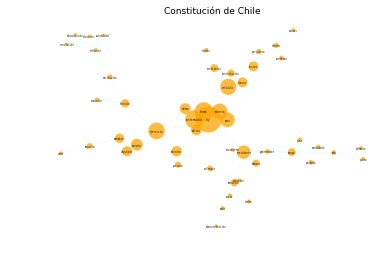

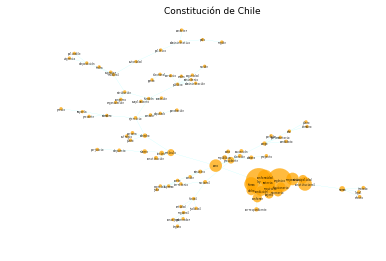

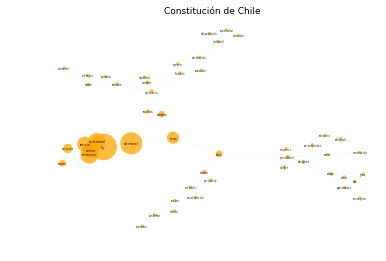

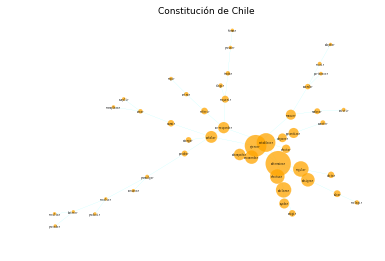

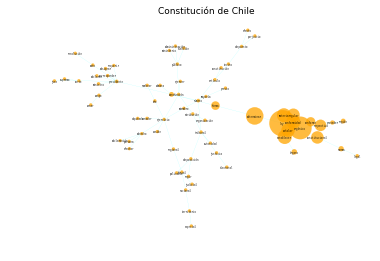

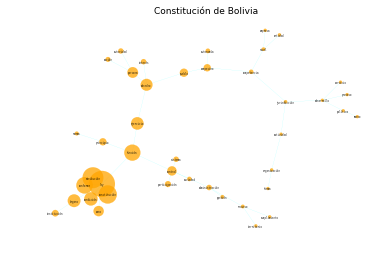

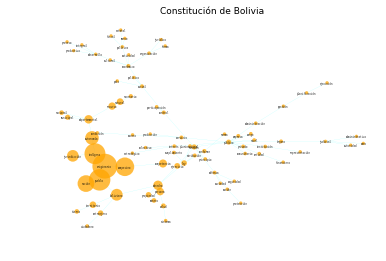

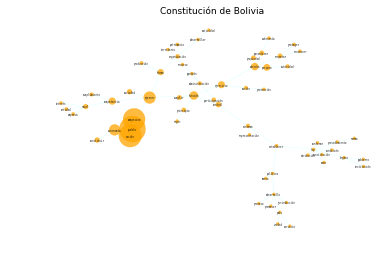

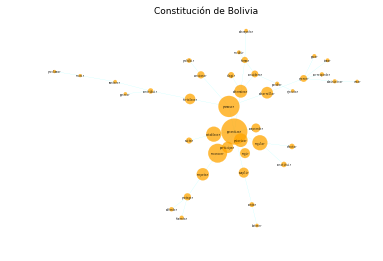

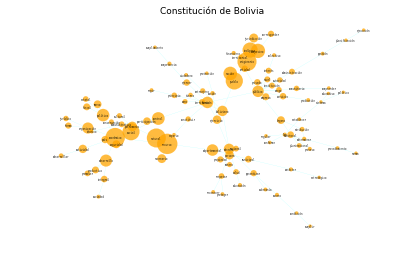

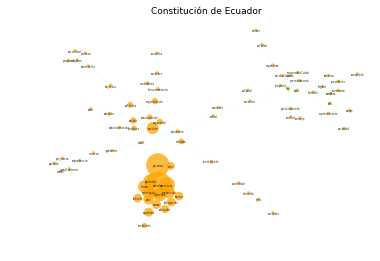

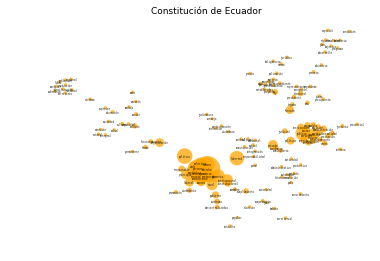

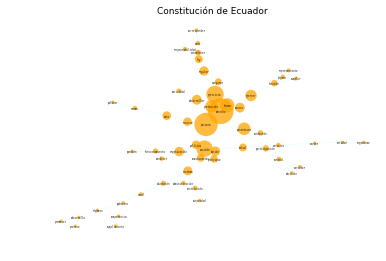

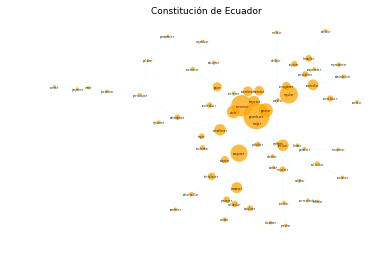

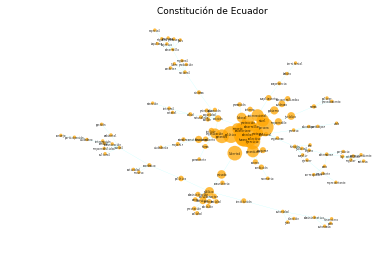

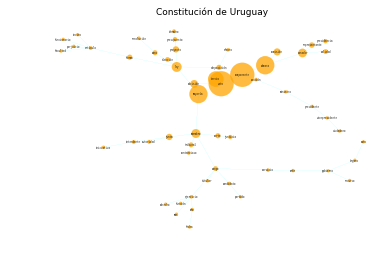

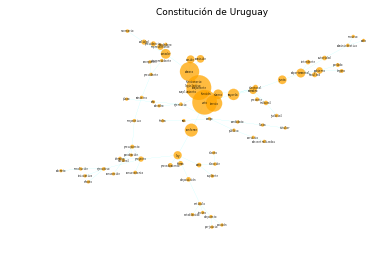

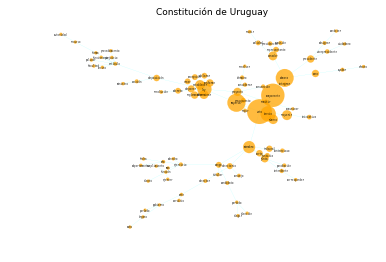

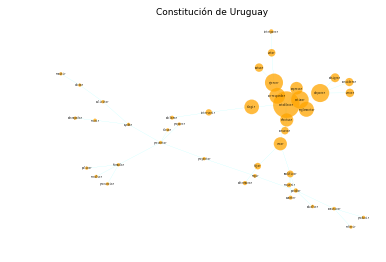

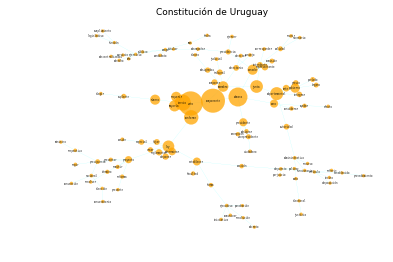

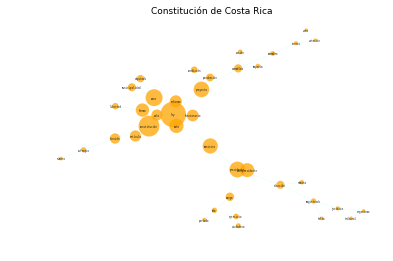

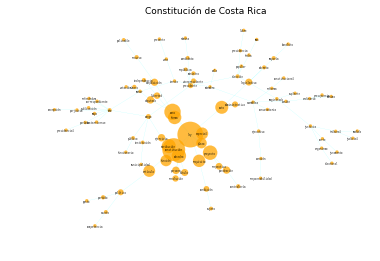

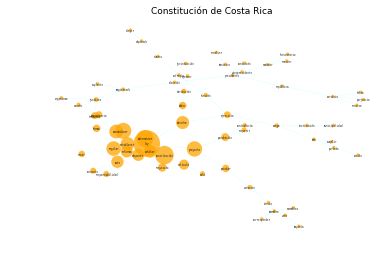

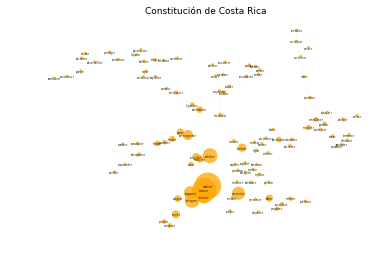

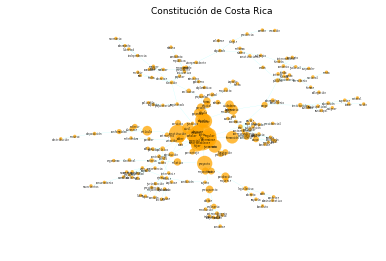

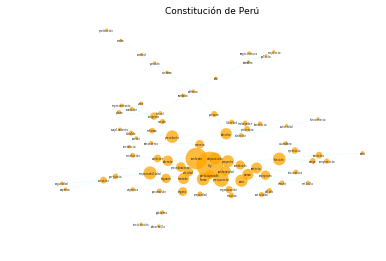

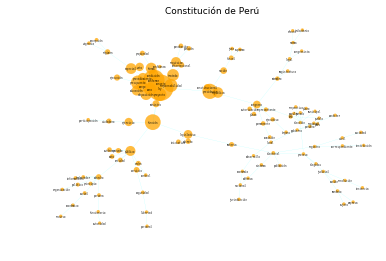

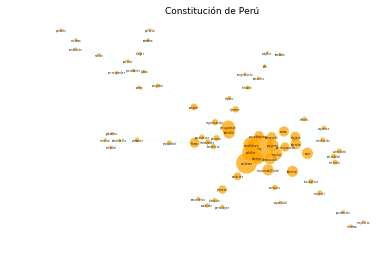

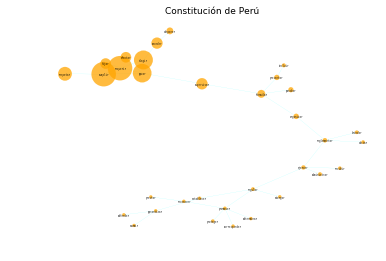

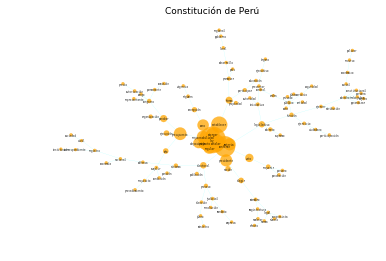

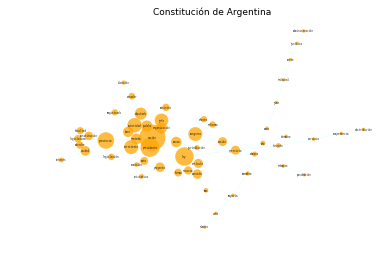

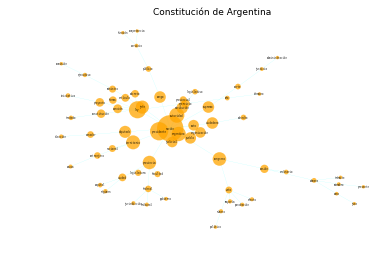

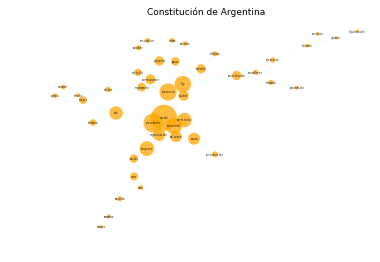

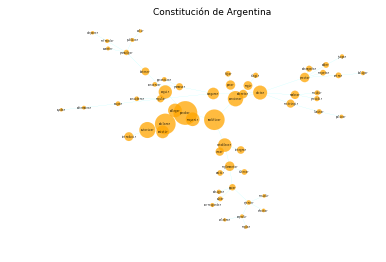

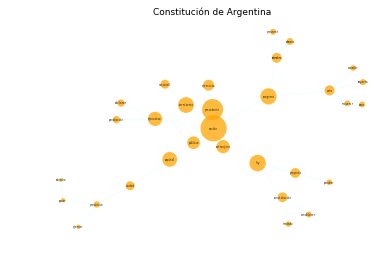

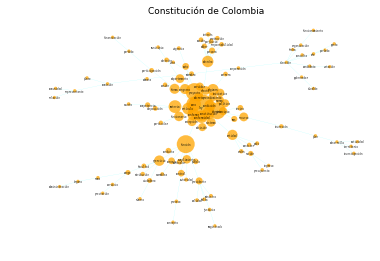

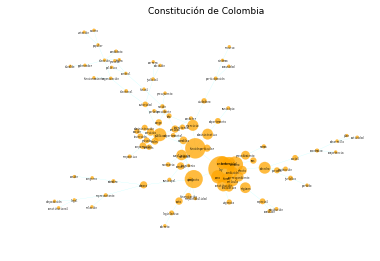

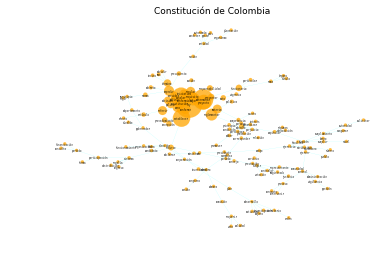

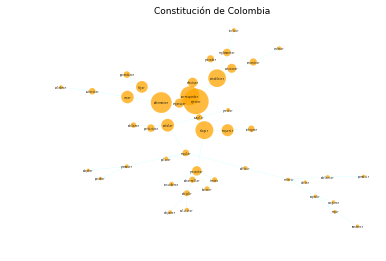

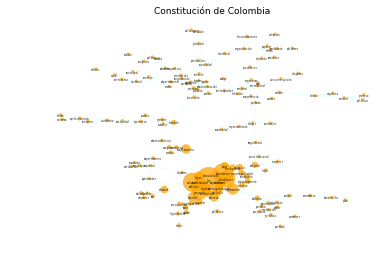

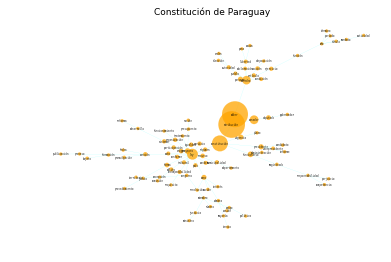

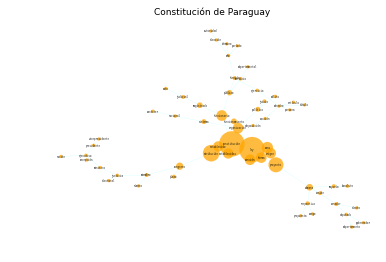

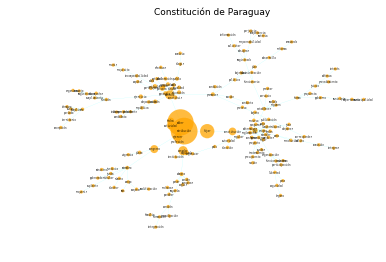

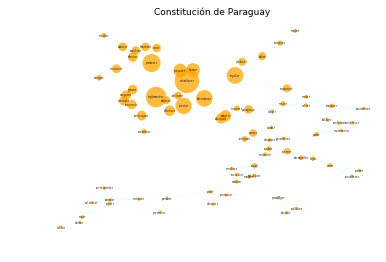

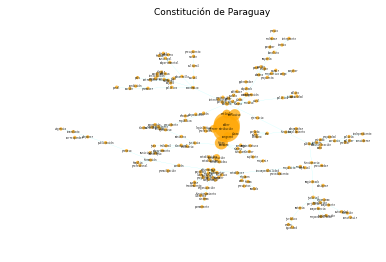

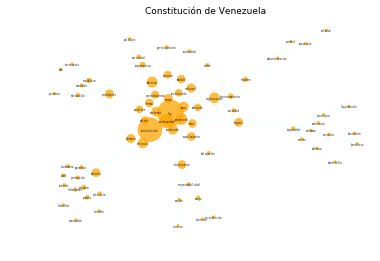

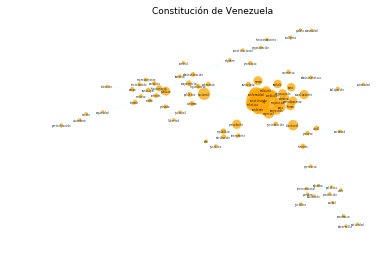

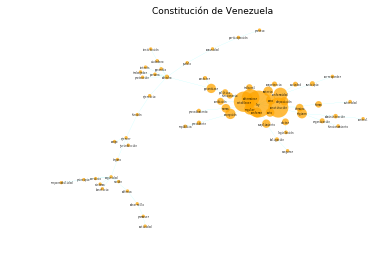

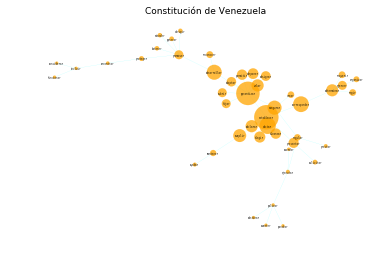

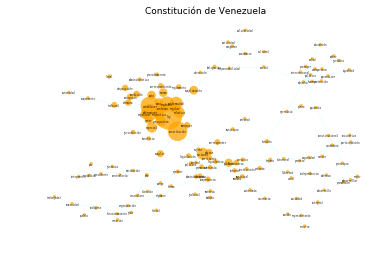

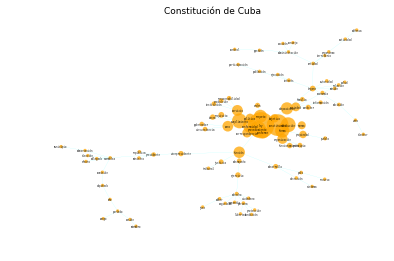

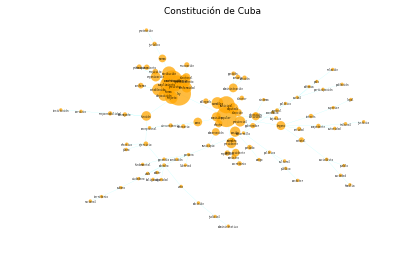

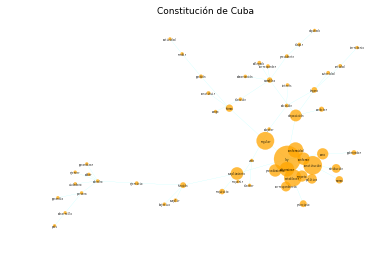

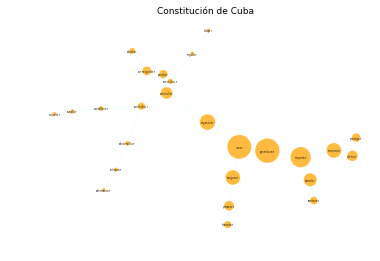

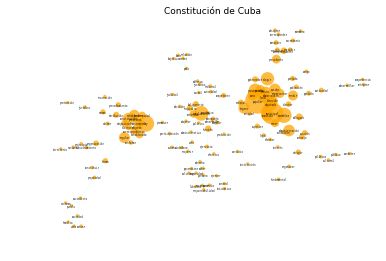

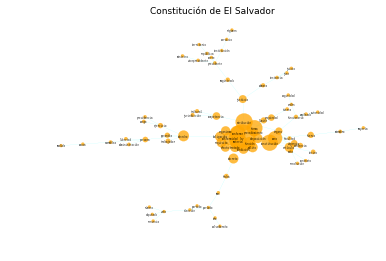

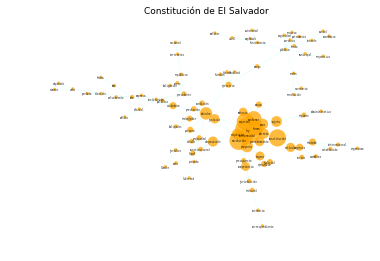

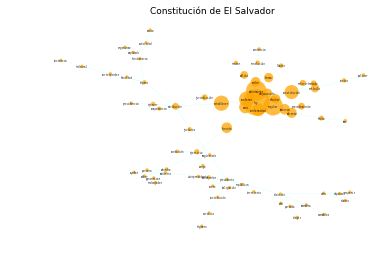

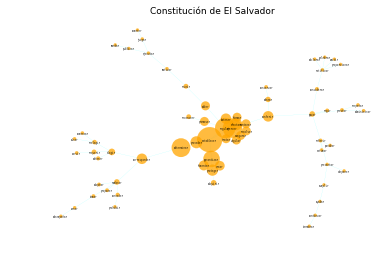

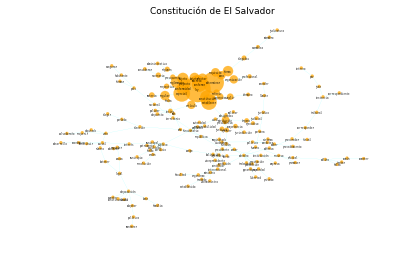

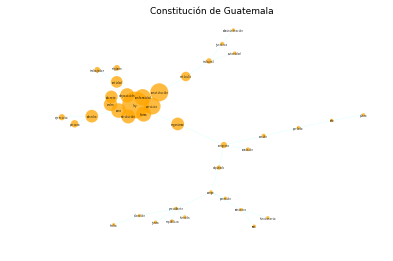

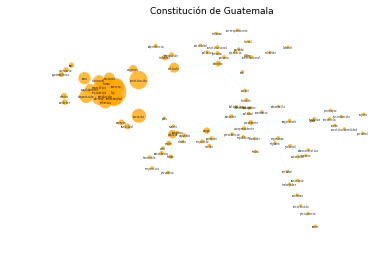

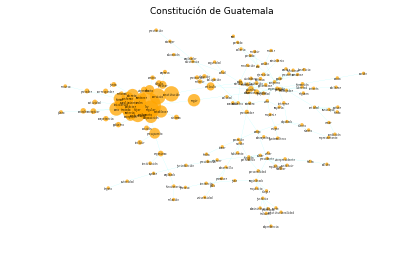

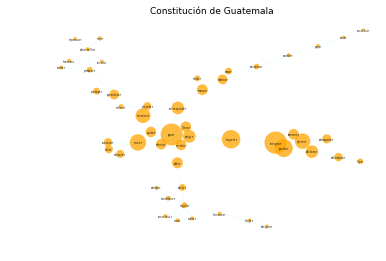

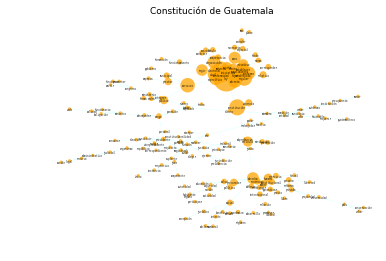

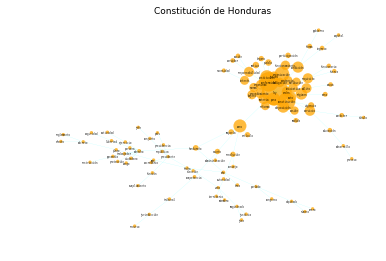

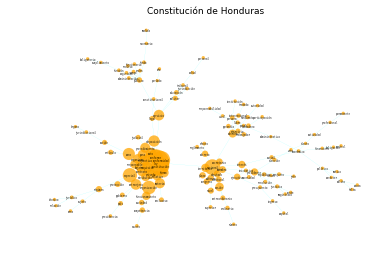

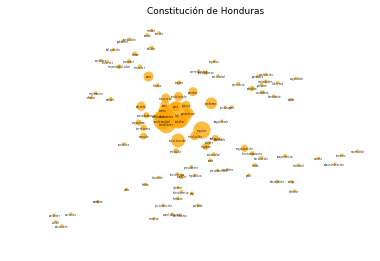

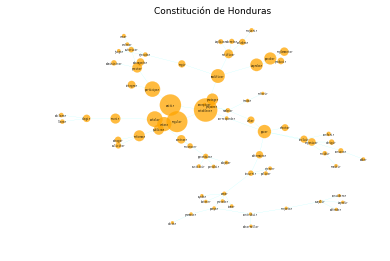

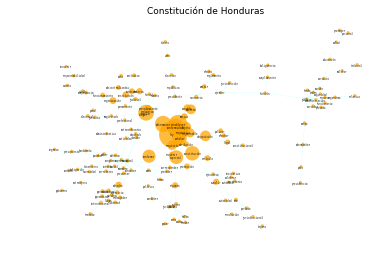

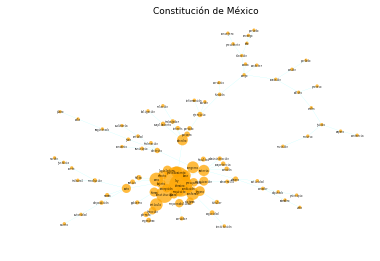

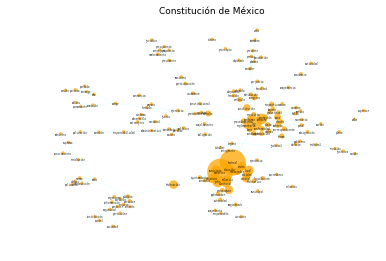

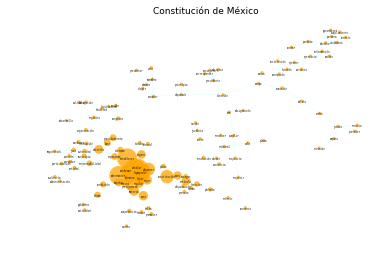

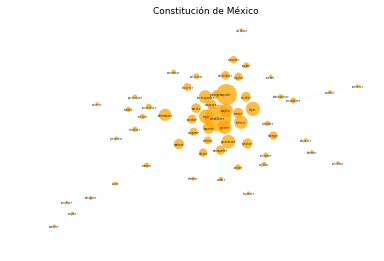

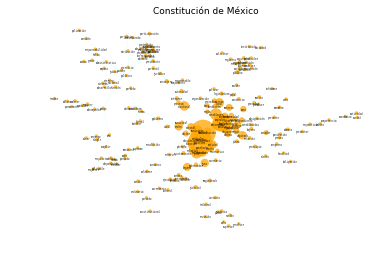

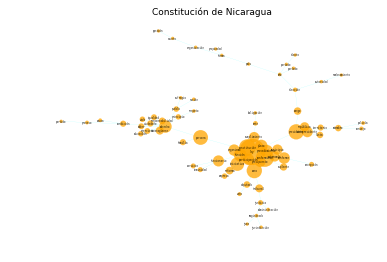

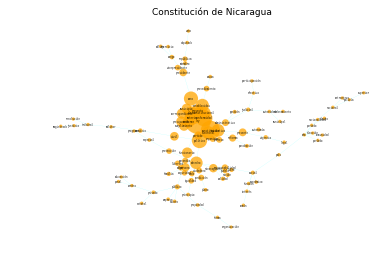

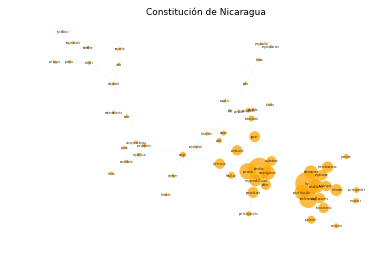

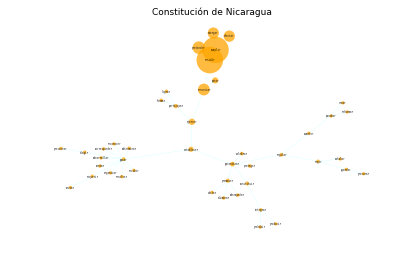

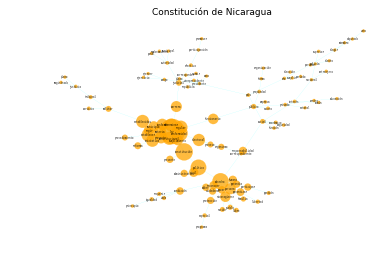

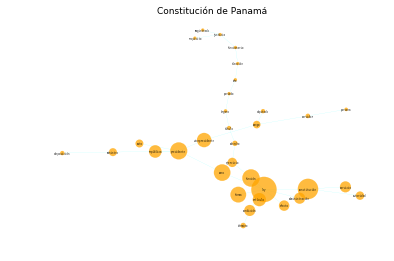

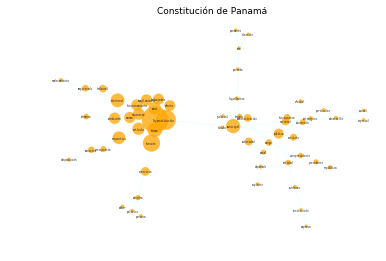

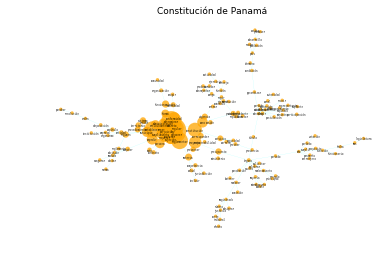

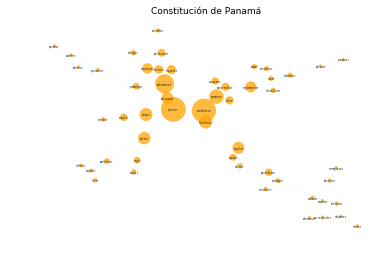

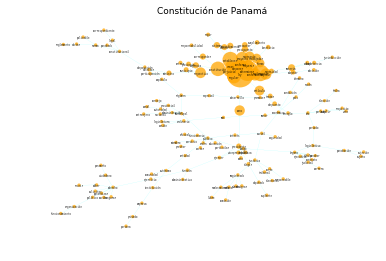

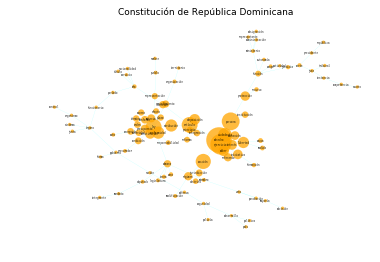

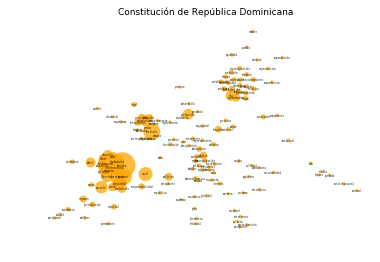

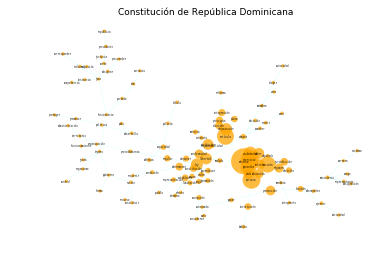

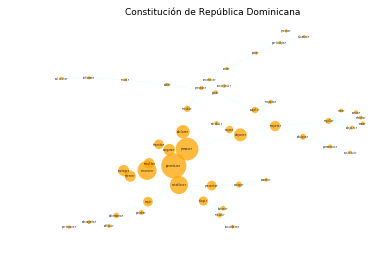

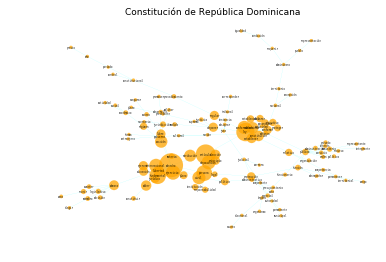

In [149]:
for country_pair in [(chile,'Chile'),(bolivia,'Bolivia'),(ecuador,'Ecuador'),(uruguay,'Uruguay'),(costarica,'Costa Rica'),(peru,'Perú'),(argentina,'Argentina'),(colombia,'Colombia'),(paraguay,'Paraguay'),(venezuela,'Venezuela'),(cuba,'Cuba'),(elsalvador,'El Salvador'),(guatemala,'Guatemala'),(honduras,'Honduras'),(mexico,'México'),(nicaragua,'Nicaragua'),(panama,'Panamá'),(republicadominicana,'República Dominicana')]:
    for tag in ['noun','noun_adj','noun_verb','verb','all']:
        G=GoW(clean(country_pair[0],tag))
        plot_graph(G,tag,country_pair[1])

## centrality rankings

In [150]:
country_pairs=[(chile,'Chile'),(bolivia,'Bolivia'),(ecuador,'Ecuador'),(uruguay,'Uruguay'),(costarica,'Costa Rica'),(peru,'Perú'),(argentina,'Argentina'),(colombia,'Colombia'),(paraguay,'Paraguay'),(venezuela,'Venezuela'),(cuba,'Cuba'),(elsalvador,'El Salvador'),(guatemala,'Guatemala'),(honduras,'Honduras'),(mexico,'México'),(nicaragua,'Nicaragua'),(panama,'Panamá'),(republicadominicana,'República Dominicana')]
centrality={country_pair[1]:{} for country_pair in country_pairs}

def normalize(d):
    raw = max(d.values())
    return {key:value/float(raw) for key,value in d.items()}

for country_pair in country_pairs:
    print(country_pair[1])
    for tag in ['noun','noun_adj','noun_verb','verb','all']:
        G=GoW(clean(country_pair[0],tag))
        G.remove_edges_from(nx.selfloop_edges(G))
        G=nx.k_core(G)
        G=nx.maximum_spanning_tree(G,weight='weight')
    
        eigen_centrality = normalize(nx.eigenvector_centrality(G,weight='weight',max_iter=10000))
        #sorted_centrality = list(zip(*sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)[:25]))[0]
        sorted_centrality = sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)
        centrality[country_pair[1]][tag]=dict(sorted_centrality)

Chile
Bolivia
Ecuador
Uruguay
Costa Rica
Perú
Argentina
Colombia
Paraguay
Venezuela
Cuba
El Salvador
Guatemala
Honduras
México
Nicaragua
Panamá
República Dominicana


In [151]:
centrality['Bolivia']['verb']

{'garantizar': 1.0,
 'promover': 0.6554133672820261,
 'reconocer': 0.517954217146512,
 'regular': 0.32582955696558963,
 'establecer': 0.32526750934812515,
 'priorizar': 0.2625054410430773,
 'determinar': 0.22987733078444128,
 'respetar': 0.21215863206948482,
 'desarrollar': 0.1862062712803617,
 'participar': 0.17500362736205155,
 'fortalecer': 0.14802752082419024,
 'cumplir': 0.13393686422071938,
 'regir': 0.13125272052153866,
 'comprender': 0.10208544929453006,
 'sancionar': 0.061595610355136166,
 'proteger': 0.06003406873602601,
 'ejercer': 0.05391471775871601,
 'considerar': 0.052700251463072306,
 'formar': 0.04078535375108073,
 'elegir': 0.04023018545764053,
 'evitar': 0.03794943497260401,
 'afectar': 0.028511257416239583,
 'constituir': 0.028511257416239583,
 'contribuir': 0.026570091862064976,
 'contar': 0.019258030952361373,
 'prohibir': 0.01616918286259256,
 'defender': 0.01225745921059863,
 'fomentar': 0.01050639360908454,
 'administrar': 0.009733572271781878,
 'aprobar': 0.00

## metaweb!
### only verbs! (as an example)

In [184]:
graphs={}
nodes=[]
for country_pair in [(chile,'Chile'),(bolivia,'Bolivia'),(ecuador,'Ecuador'),(uruguay,'Uruguay'),(costarica,'Costa Rica'),(peru,'Perú'),(argentina,'Argentina'),(colombia,'Colombia'),(paraguay,'Paraguay'),(venezuela,'Venezuela'),(cuba,'Cuba'),(elsalvador,'El Salvador'),(guatemala,'Guatemala'),(honduras,'Honduras'),(mexico,'México'),(nicaragua,'Nicaragua'),(panama,'Panamá'),(republicadominicana,'República Dominicana')]:    
    print(country_pair[1])
    G=GoW(clean(country_pair[0],'verb'))
    G.remove_edges_from(nx.selfloop_edges(G))
    G=nx.k_core(G)
    #G=nx.maximum_spanning_tree(G,weight='weight')
    graphs[country_pair[1]]=G
    nodes+=[list(G.nodes())]

Chile
Bolivia
Ecuador
Uruguay
Costa Rica
Perú
Argentina
Colombia
Paraguay
Venezuela
Cuba
El Salvador
Guatemala
Honduras
México
Nicaragua
Panamá
República Dominicana


In [185]:
G_global=nx.compose_all(graphs.values())
G_global=nx.maximum_spanning_tree(G_global,weight='weight')

In [200]:
import numpy.linalg as la
import scipy.cluster.vq as vq


def plot_metaweb(G,tag):
     
    eigen_centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=10000)
    node_sizes=list(eigen_centrality.values())
    sorted_centrality = list(zip(*sorted(eigen_centrality.items(), key=operator.itemgetter(1),reverse=True)[:15]))[0]
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes if i in ['garantizar','establecer']}#sorted_centrality}
    
    A = nx.adjacency_matrix(G,weight=None)
    D = np.diag(np.ravel(np.sum(A,axis=1)))
    L = D - A
    l, U = la.eigh(L)
    f = U[:,1]
    #k = 2
    #means, labels_color = vq.kmeans2(U[:,1:k], k)
    labels_color = np.ravel(np.sign(f))
    colors=['cyan','yellow','m']
    nx.draw_networkx_nodes(G, pos, node_size = [1000*(x+0.01) for x in node_sizes], node_color=['cyan' if x==1 else 'yellow' for x in labels_color],linewidths=0.1,alpha=0.75) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='gray')
    nx.draw_networkx_labels(G,pos,labels=labels,alpha=0.95,font_size=4,font_color='k',font_family='monospace')
    plt.axis('off')
    #plt.title('Constitución de '+country,fontname="Arial",fontsize=9)
    if tag=='noun':
        plt.savefig('figuras/'+tag+'/constitucion_noun.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='noun_verb':
        plt.savefig('figuras/'+tag+'/constitucion_noun_verb.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='noun_adj':
        plt.savefig('figuras/'+tag+'/constitucion_noun_adj.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    if tag=='verb':
        plt.savefig('figuras/'+tag+'/constitucion_verb.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    elif tag=='all':
        plt.savefig('figuras/'+tag+'/constitucion_all.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=1080)
    plt.show()

/home/javier/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


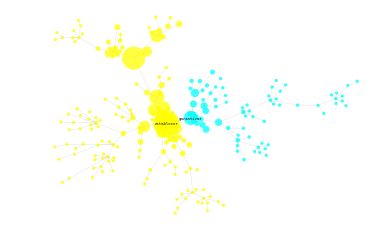

In [201]:
plot_metaweb(G_global,'verb')

In [226]:
from collections import defaultdict

def cluster(G):
    
    A = nx.adjacency_matrix(G,weight=None)
    D = np.diag(np.ravel(np.sum(A,axis=1)))
    L = D - A
    l, U = la.eigh(L)
    f = U[:,1]
    #k = 2
    #means, labels_color = vq.kmeans2(U[:,1:k], k)
    labels_color = np.ravel(np.sign(f))
    
    d={word:label for word,label in zip(G.nodes(),labels_color)}
    
    return d

In [227]:
C=cluster(G_global)

In [228]:
C

{'nombrar': -1.0,
 'reelegir': -1.0,
 'promulgar': -1.0,
 'cesar': -1.0,
 'regular': -1.0,
 'reunir': 1.0,
 'encomendar': 1.0,
 'acordar': 1.0,
 'regir': -1.0,
 'cumplir': -1.0,
 'durar': -1.0,
 'elegir': -1.0,
 'referir': -1.0,
 'convocar': 1.0,
 'garantizar': 1.0,
 'ejercer': 1.0,
 'resolver': -1.0,
 'asumir': -1.0,
 'entrar': -1.0,
 'existir': -1.0,
 'exigir': 1.0,
 'formar': -1.0,
 'requerir': -1.0,
 'otorgar': -1.0,
 'establecer': -1.0,
 'proveer': -1.0,
 'adoptar': -1.0,
 'resultar': 1.0,
 'aprobar': -1.0,
 'obtener': 1.0,
 'someter': -1.0,
 'efectuar': -1.0,
 'remover': -1.0,
 'determinar': 1.0,
 'declarar': 1.0,
 'pertenecer': 1.0,
 'designar': -1.0,
 'quedar': 1.0,
 'proceder': -1.0,
 'afectar': 1.0,
 'dictar': -1.0,
 'señalar': -1.0,
 'producir': -1.0,
 'desempeñar': 1.0,
 'corresponder': -1.0,
 'reemplazar': -1.0,
 'tratar': -1.0,
 'disponer': -1.0,
 'gozar': 1.0,
 'participar': -1.0,
 'contribuir': 1.0,
 'comprender': -1.0,
 'promover': 1.0,
 'ejecutar': -1.0,
 'sancionar':

In [237]:
def cluster_weight(country):
    D={'garantizar':0,'establecer':0}
    G=graphs[country]
    nodes=G.nodes()
    for node in nodes:
        if C[node]==C['garantizar']:
            D['garantizar']+=centrality[country]['verb'][node]
        else:
            D['establecer']+=centrality[country]['verb'][node]
    
    return D

In [240]:
cluster_weight('Ecuador')

{'garantizar': 3.596160158598864, 'establecer': 1.4548940359314313}

In [242]:
cluster_countries={}
for country in ['Chile','Bolivia','Ecuador','Uruguay','Costa Rica','Perú','Argentina','Colombia','Paraguay','Venezuela','Cuba','El Salvador','Guatemala','Honduras','México','Nicaragua','Panamá','República Dominicana']:    
    cluster_countries[country]=cluster_weight(country)

In [243]:
cluster_countries

{'Chile': {'garantizar': 3.014767919555646, 'establecer': 2.6167375416102434},
 'Bolivia': {'garantizar': 3.462974608176403, 'establecer': 1.498035465445567},
 'Ecuador': {'garantizar': 3.596160158598864,
  'establecer': 1.4548940359314313},
 'Uruguay': {'garantizar': 0.6876856207373119,
  'establecer': 3.9579444055519573},
 'Costa Rica': {'garantizar': 0.5528634276432907,
  'establecer': 3.6252644855517837},
 'Perú': {'garantizar': 1.3398620417777105, 'establecer': 3.166204181077572},
 'Argentina': {'garantizar': 1.513646297182746, 'establecer': 6.0541956584378},
 'Colombia': {'garantizar': 2.0879751418921435,
  'establecer': 3.188480300494524},
 'Paraguay': {'garantizar': 2.1410700044434763,
  'establecer': 5.008188989363025},
 'Venezuela': {'garantizar': 3.2134525282864512,
  'establecer': 3.3241248823020904},
 'Cuba': {'garantizar': 3.654377949593331, 'establecer': 1.5469309039624093},
 'El Salvador': {'garantizar': 2.6846209112738406,
  'establecer': 3.084639855033838},
 'Guatemal

In [246]:
cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for i in range(len(cluster_countries.keys())):
    x=cluster_countries[list(cluster_countries.keys())[i]]['garantizar']
    y=cluster_countries[list(cluster_countries.keys())[i]]['establecer']

    ax.plot(x,y,'o',color='r',markersize=2,markeredgewidth=1.,fillstyle='full',clip_on=True)
    ax.annotate(list(cluster_countries.keys())[i], weight='demi', color='k', xy=(x+500,y+100), fontsize=6, alpha=0.5)

plt.grid(False)
#plt.legend(loc='best')
#plt.xlim([-4.25,7.25])
#plt.ylim([-1.75,2.25])
plt.ylabel(r'establecer (to establish)',fontsize=12)
plt.xlabel(r'satisfacer (to guarantee)',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('cluster.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

ValueError: Image size of 403442x47911 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4800x3200 with 1 Axes>